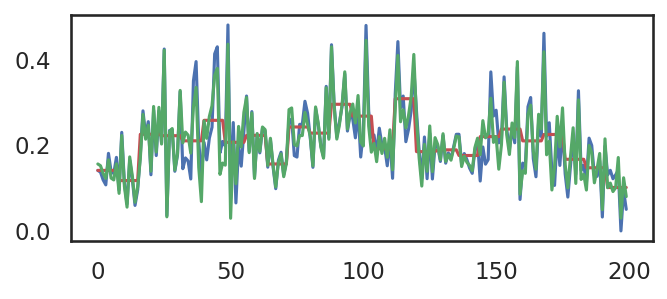

In [316]:
# modified from https://stackoverflow.com/questions/43514247/pywavelet-signal-reconstruction
# also check A New Approach for the Visualization of DNA Methylation Results
# https://onlinelibrary.wiley.com/doi/epdf/10.1002/cmm4.1043

import numpy as np
import pywt
import matplotlib.pyplot as plt

def dummy_wave(n=5):
# https://stackoverflow.com/questions/36286566/how-to-generate-noisy-mock-time-series-or-signal-in-python
    n = 200
    limit_low = 0
    limit_high = 0.48
    my_data = np.random.normal(0, 0.5, n) \
              + np.abs(np.random.normal(0, 2, n) \
                       * np.sin(np.linspace(0, 3*np.pi, n)) ) \
              + np.sin(np.linspace(0, n*np.pi, n))**2 \
              + np.sin(np.linspace(1, (n+10)*np.pi, n))**2

    scaling = (limit_high - limit_low) / (max(my_data) - min(my_data))
    my_data = my_data * scaling
    my_data = my_data + (limit_low - min(my_data))
    
    return my_data


data = dummy_wave()
n = data.shape[0]

wavelet_family = 'haar'
mode = 'smooth'
level = 3
coeff_all = pywt.wavedec(data, wavelet = wavelet_family, mode=mode, level=level)
cA, cD = coeff_all[0], coeff_all[1:]

omp0 = pywt.upcoef('a', cA, wavelet_family, level=level)[:n]
omp1 = pywt.upcoef('d', cD[-1], wavelet_family, level=1)[:n]
omp2 = pywt.upcoef('d', cD[-2], wavelet_family, level=2)[:n]
# omp3 = pywt.upcoef('d', cD[-3], wavelet_family, level=3)[:n]

plt.figure(figsize=(5,2))
p_original, = plt.plot(data, 'b')
p_mother, = plt.plot(omp0,'r')
p_restored, =  plt.plot(omp0 + omp1 + omp2, 'g')

plt.show()

In [317]:
# generate a dataset of random waves

n = 5

y = np.random.randint(5,7,n)

X = [dummy_wave(_) for _ in y]

In [318]:
y

array([5, 5, 5, 6, 6])

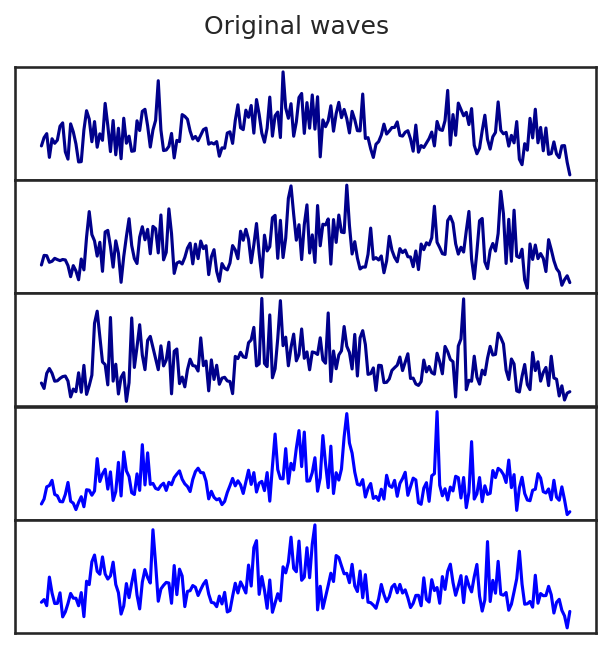

In [322]:
# plot
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
%matplotlib inline
sns.set(style='white',
        context='notebook',
        rc={'figure.figsize':(5,5),
            'figure.dpi':150,
            'savefig.dpi':150})


fig, axs = plt.subplots(nrows=n, ncols=1, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .0, wspace=.0)
fig.suptitle('Original waves', fontsize=12, y=.95)

for idx, ax, c in zip(np.arange(n), axs.ravel(), y):
    
    ax.plot(X[idx], color={6:'blue', 5:'darkblue'}.get(c))
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])

plt.show()
# fig.savefig(f'./figures/fig.png',  bbox_inches='tight')   # save the figure to file
plt.close(fig)

In [320]:
def get_mother_WT(data, restored = True):
    wavelet_family = 'haar'
    mode = 'smooth'
    level = 3
    coeff_all = pywt.wavedec(data, wavelet = wavelet_family, mode=mode, level=level)
    cA, cD = coeff_all[0], coeff_all[1:]
    
    if restored:
        n = data.shape[0]
        omp0 = pywt.upcoef('a', cA, wavelet_family, level=level)[:n]
        return omp0 # restored mother wavelet
    else:
        return cA # compressed mother wavelet

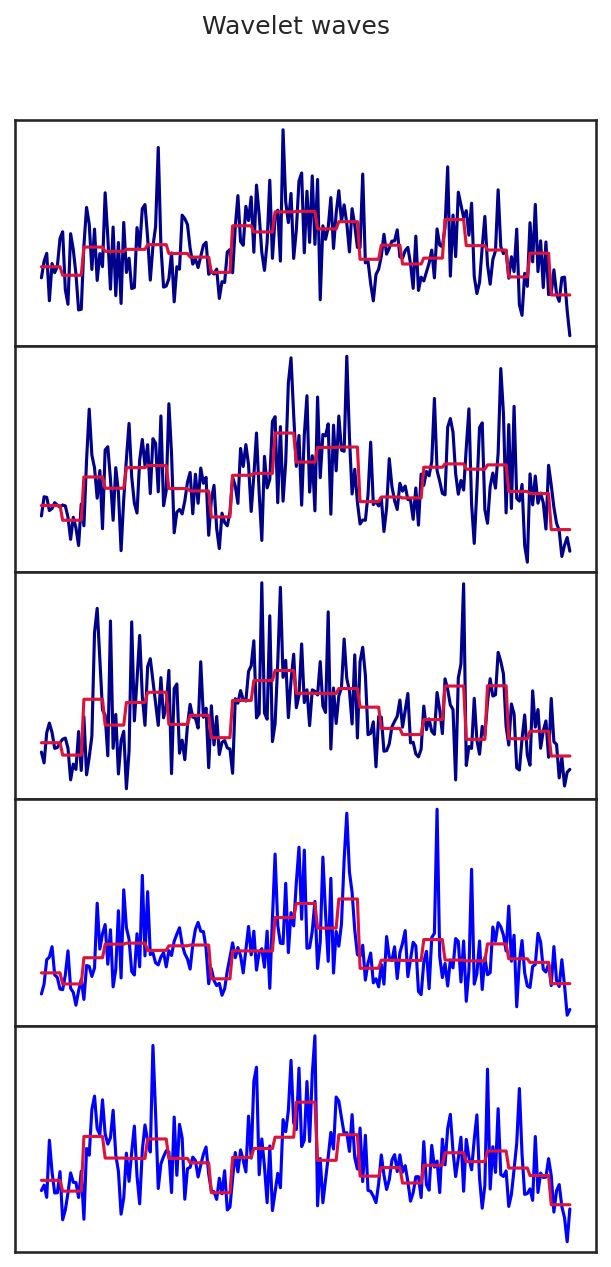

In [323]:
# generate a dataset of random waves

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
%matplotlib inline
sns.set(style='white',
        context='notebook',
        rc={'figure.figsize':(5,10),
            'figure.dpi':150,
            'savefig.dpi':150})

fig, axs = plt.subplots(nrows=n, ncols=1, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .0, wspace=.0)
fig.suptitle('Wavelet waves', fontsize=12, y=.95)

for idx, ax, c in zip(np.arange(n), axs.ravel(), y):
    ax.plot(X[idx], color={6:'blue', 5:'darkblue'}.get(c))
    ax.plot(get_mother_WT(X[idx]), color='crimson')
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])

plt.show()
# fig.savefig(f'./figures/fig.png',  bbox_inches='tight')   # save the figure to file
plt.close(fig)

In [337]:
# generate a larger dataset of random waves

n = 30

y = np.random.randint(5,7,n)

X = np.asarray([dummy_wave(_) for _ in y])

In [338]:
from sklearn.preprocessing import OrdinalEncoder
# from sklearn.model_selection import train_test_split

ord_enc = OrdinalEncoder()

y_enc = ord_enc.fit_transform(y.reshape(-1,1)).ravel().astype(int)

# X_train, X_test, y_train, y_test = train_test_split(X, y_enc, 
#                                                     test_size=0.25, 
#                                                     random_state=1, 
#                                                     shuffle=True, 
#                                                     stratify=y)

In [339]:
X

array([[0.08926231, 0.07830293, 0.12855369, ..., 0.08765698, 0.1343749 ,
        0.06158967],
       [0.11275969, 0.08404413, 0.12359771, ..., 0.00450868, 0.08123538,
        0.09789505],
       [0.08503429, 0.04093788, 0.07821165, ..., 0.02082381, 0.04457962,
        0.00835625],
       ...,
       [0.08750587, 0.1532453 , 0.23471588, ..., 0.03252268, 0.        ,
        0.05923927],
       [0.07699947, 0.05657002, 0.1217365 , ..., 0.06394027, 0.        ,
        0.06155892],
       [0.10947561, 0.08621882, 0.12973749, ..., 0.08236738, 0.        ,
        0.02741262]])

In [340]:
y_enc

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1])

In [341]:
# https://pyts.readthedocs.io/en/latest/generated/pyts.classification.TimeSeriesForest.html
# https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.classification.interval_based.TimeSeriesForestClassifier.html#sktime.classification.interval_based.TimeSeriesForestClassifier

from sktime.classification.all import *
model = TimeSeriesForestClassifier(min_interval=3,
                                    n_estimators=200,
                                    n_jobs=1,
                                    random_state=42)

# https://www.sktime.org/en/v0.10.1/api_reference/auto_generated/sktime.classification.interval_based.CanonicalIntervalForest.html#r3ee1a93db40f-1
# from sktime.classification.interval_based import CanonicalIntervalForest
# classifier = CanonicalIntervalForest(n_estimators=200, 
#                                      n_intervals=None, 
#                                      att_subsample_size=8, 
#                                      min_interval=3, 
#                                      max_interval=None, 
#                                      base_estimator='CIT', 
#                                      n_jobs=1, 
#                                      random_state=None)

In [342]:
# from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# define cross-validation method to use
# cv = LeaveOneOut()

In [343]:
# make prediction based on the original waves

scores = cross_val_score(classifier,
                         X,
                         y_enc,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)

np.mean(np.absolute(scores))

0.36666666666666664

In [344]:
X_enc = np.asarray([get_mother_WT(_, restored = False) for _ in X])

In [345]:
# make prediction based on the wavelets waves

scores = cross_val_score(classifier, 
                         X_enc,
                         y_enc, 
                         scoring='neg_mean_absolute_error',
                         cv=10,
                         n_jobs=-1)

np.mean(np.absolute(scores))

0.6333333333333332